In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import files

**Q1. Load the dataset into python environment**

Saving titanic_dataset.csv to titanic_dataset (2).csv


In [ ]:
import io
data = pd.read_csv(io.StringIO(uploaded['titanic_dataset.csv'].decode('utf-8')))
print(data)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Q2. Making PassengerId as index**



In [ ]:
data=data.set_index('PassengerId')

In [ ]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


**Q3. To check the basic details of the dataset**



In [ ]:
data.shape

(891, 11)

In [ ]:
data.info

<bound method DataFrame.info of              Survived  Pclass  ... Cabin Embarked
PassengerId                    ...               
1                   0       3  ...   NaN        S
2                   1       1  ...   C85        C
3                   1       3  ...   NaN        S
4                   1       1  ...  C123        S
5                   0       3  ...   NaN        S
...               ...     ...  ...   ...      ...
887                 0       2  ...   NaN        S
888                 1       1  ...   B42        S
889                 0       3  ...   NaN        S
890                 1       1  ...  C148        C
891                 0       3  ...   NaN        Q

[891 rows x 11 columns]>

In [ ]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [ ]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

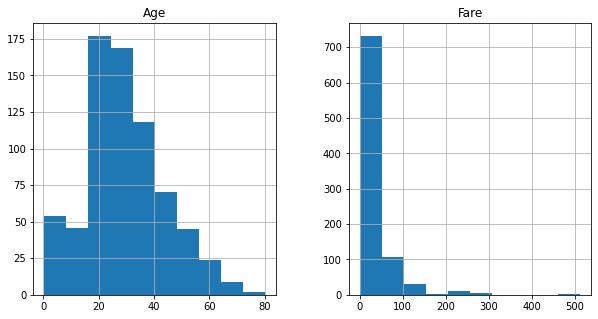

In [ ]:
freqgraph= data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(10,5))
plt.show()

**Q4. Fill in all the missing values present in all the columns in the dataset**



In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data['Age']= data['Age'].fillna(data['Age'].median())

In [ ]:
data.Embarked.fillna(data.Embarked.mode()[0], inplace = True)

In [ ]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [ ]:
#Since there are too many missing values in cabin column, filling all the missing field with a new value NA

In [ ]:
data.Cabin = data.Cabin.fillna('NA')

In [ ]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

**Q5. Check and handle outliers in at least 3 columns in the dataset**



In [ ]:
#1.Checking for outliers in Age column

Text(0.5, 1.0, 'Box plot of Age')

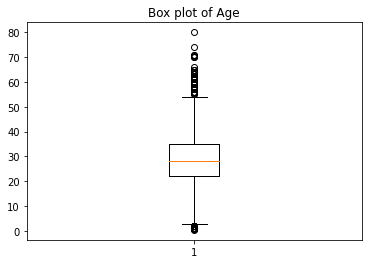

In [ ]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

In [ ]:
Q1=np.percentile(data['Age'],25,interpolation ='midpoint')
Q2=np.percentile(data['Age'],50,interpolation ='midpoint')
Q3=np.percentile(data['Age'],75,interpolation ='midpoint')
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [ ]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+ 1.5*IQR
print(low_lim)
print(up_lim)

2.5
54.5


In [ ]:
outlier =[]
for x in data['Age']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [ ]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [ ]:
ind1 = data['Age']>up_lim
data.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [ ]:
data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

In [ ]:
ind2 = data['Age']<low_lim
data.loc[ind2].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [ ]:
data.drop([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],inplace=True)

Text(0.5, 1.0, 'Box plot of Age')

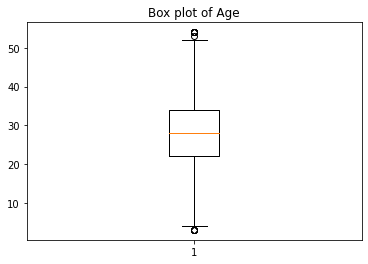

In [ ]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

In [ ]:
#2.Checking for outliers in SibSp

Text(0.5, 1.0, 'Box plot of SibSp-with outliers')

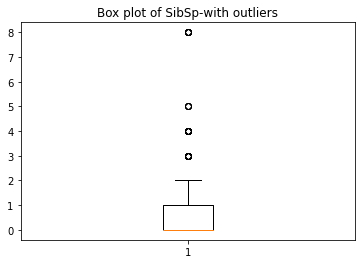

In [ ]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp-with outliers')

In [ ]:
Q1=np.percentile(data['SibSp'],25,interpolation ='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation ='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation ='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [ ]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+ 1.5*IQR
print(low_lim)
print(up_lim)

-1.5
2.5


In [ ]:
outlier =[]
for x in data['SibSp']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [ ]:
outlier

[3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 8,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 8,
 4,
 8]

In [ ]:
ind1 = data['SibSp']>up_lim
data.loc[ind1].index

Int64Index([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [ ]:
data.drop([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],inplace=True)

Text(0.5, 1.0, 'Box plot of SibSp')

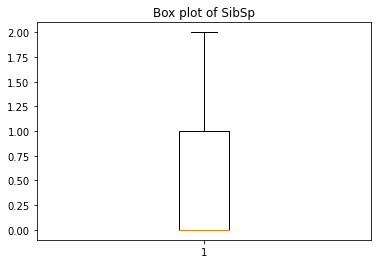

In [ ]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

In [ ]:
#3.Checking the Fare column for outliers & removing

Text(0.5, 1.0, 'Box plot of Fare')

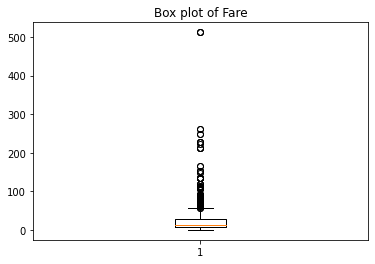

In [ ]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

In [ ]:
Q1=np.percentile(data['Fare'],25,interpolation ='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation ='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation ='midpoint')
print(Q1)
print(Q2)
print(Q3)

7.8958
13.0
27.75


In [ ]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+ 1.6*IQR
print(low_lim)
print(up_lim)

-21.885499999999997
59.51672


In [ ]:
outlier =[]
for x in data['Fare']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [ ]:
outlier

[71.2833,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 61.175,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 61.3792,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 120.0,
 93.5,
 83.1583,
 89.1042,
 164.8667]

In [ ]:
ind1 = data['Fare'] >up_lim
data.loc[ind1].index

Int64Index([  2,  32,  35,  53,  62,  63,  73,  93,  98, 103, 119, 121, 125,
            140, 152, 156, 216, 219, 225, 231, 246, 257, 258, 259, 263, 270,
            291, 292, 300, 307, 308, 311, 312, 319, 320, 326, 333, 335, 337,
            338, 370, 374, 376, 378, 381, 386, 391, 394, 413, 436, 446, 454,
            485, 487, 497, 499, 505, 506, 521, 528, 538, 541, 545, 551, 558,
            559, 582, 586, 592, 610, 616, 628, 642, 646, 656, 661, 666, 680,
            682, 690, 699, 701, 709, 717, 731, 738, 742, 743, 755, 760, 764,
            766, 780, 790, 803, 821, 836, 850, 857],
           dtype='int64', name='PassengerId')

In [ ]:
data.drop([  2,  32,  35,  53,  62,  63,  73,  93,  98, 103, 119, 121, 125,
            140, 152, 156, 216, 219, 225, 231, 246, 257, 258, 259, 263, 270,
            291, 292, 300, 307, 308, 311, 312, 319, 320, 326, 333, 335, 337,
            338, 370, 374, 376, 378, 381, 386, 391, 394, 413, 436, 446, 454,
            485, 487, 497, 499, 505, 506, 521, 528, 538, 541, 545, 551, 558,
            559, 582, 586, 592, 610, 616, 628, 642, 646, 656, 661, 666, 680,
            682, 690, 699, 701, 709, 717, 731, 738, 742, 743, 755, 760, 764,
            766, 780, 790, 803, 821, 836, 850, 857],inplace=True)

Text(0.5, 1.0, 'Box plot of Fare')

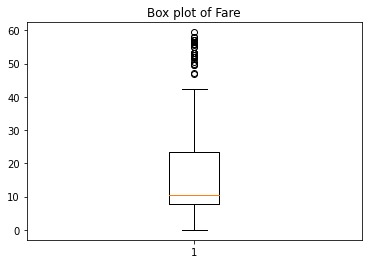

In [ ]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

In [ ]:
#Encoding

In [ ]:
# Dropping columns Name, Ticket & Cabin, and done one hot encoding for 'Pclass', 'Sex' & 'Embarked'


In [ ]:
data.Name.nunique()


687

In [ ]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NA,Q
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NA,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NA,S


In [ ]:
cols = ['Name', 'Ticket', 'Cabin']
dframe = data.drop(cols, axis=1)

In [ ]:
dframe

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
6,0,3,male,28.0,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


In [ ]:
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
    dummies.append(pd.get_dummies(dframe[col]))

In [ ]:
titanic_dummies = pd.concat(dummies, axis=1)

In [ ]:
dframe = pd.concat((dframe,titanic_dummies), axis=1)

In [ ]:
dframe = dframe.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [ ]:
dframe

,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
PassengerId,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
6,0,28.0,0,0,8.4583,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,27.0,0,0,13.0000,0,1,0,0,1,0,0,1
888,1,19.0,0,0,30.0000,1,0,0,1,0,0,0,1
889,0,28.0,1,2,23.4500,0,0,1,1,0,0,0,1


In [ ]:
dframe.columns

In [ ]:
Y = dframe['Survived']
X = dframe.drop('Survived',axis=1)

In [ ]:
#Dividing to training & test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X-train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3, random_state=42)

In [ ]:
from sklearn import linear_model
lr= linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions= model.predict(X_test)

In [ ]:
from sklearn.metrics import mean squared error
print(“MSE is: ‘mean_squared_error(y_test,predictions))
print(‘R squared value is: ‘,r_score(y_test, predictions))

**Q6. Min max scaling on the feature set (Take ‘Survived’ as target)
** **bold text**



In [ ]:
X=dframe.drop('Survived',axis=1)


In [ ]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))

In [ ]:
X=min_max.fit_transform(X)


In [ ]:
X=pd.DataFrame(x)

In [ ]:
X.describe()

,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
count,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,28.653566,0.272198,0.269287,16.501273,0.133916,0.234352,0.631732,0.312955,0.687045,0.149927,0.098981,0.751092
std,9.498085,0.500872,0.755140,12.887466,0.340810,0.423902,0.482686,0.464034,0.464034,0.357260,0.298854,0.432696
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.854200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,28.000000,0.000000,0.000000,10.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,33.000000,0.000000,0.000000,23.350000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,54.000000,2.000000,6.000000,59.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
